# Data Analysis on Cardiovascular Disease Risk Prediction 

- Objective:

This project aims to analyze the "Cardiovascular Diseases Risk Prediction Dataset" from Kaggle and further extracted from a significant study by the Behavioral Risk Factor Surveillance System (BRFSS) in 2021 from the World Health Organization (WHO). 

With 308,854 cases, this dataset offers insights into diverse factors, ranging from general health metrics, and lifestyle habits, to demographics.

The goal is to identify patterns between these factors and their influence on cardiovascular disease (heart disease) risk. 

This Exploratory & Statistical Data Analysis will involve analyzing and summarizing data to gain insights and understand its underlying patterns, relationships, and distributions.

These insights can help spot high-risk individuals early and provide timely interventions. This analysis can improve individual health management and reduce strain on healthcare. It can also lay the groundwork for future machine learning predictions on CVD risks.

# Data Examination, Prepartion, and Pre-processing

In [1]:
# Import libraries needed 

# To ignore warnings

import warnings 
warnings.filterwarnings('ignore')

# For data manipulation & analysis

import pandas as pd 

# For some arithmetic and matrix operations (numerical calculations)

import numpy as np 

# For data visualization

import matplotlib.pyplot as plt      # 2D plotting library used to draw basic charts 
import seaborn as sns                # uses short lines of code to create and style statistical plots from Pandas and Numpy

# For further statistical analysis

from scipy import stats              # probability distributions and statistical functions
from scipy.stats import chi2_contingency         # used to conduct the Chi-squared test for independence

In [2]:
# Import dataset:

df = pd.read_csv(r"C:\Users\Aya K\Desktop\CVD_cleaned.csv")

# Display first few rows of dataset:

df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [3]:
# Get an overview of the data types, null values, number of observations, etc. 

df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

(308854, 19)

## - Insights:

- There are 308854 total number of observations/cases and 19 different variables/features.
- There are no missing values. 
- There 12 categorical values (object) & 7 numerical values (float64).

In [4]:
# Double check if there are any null (NA) values:

df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [5]:
# Double check data types

df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [6]:
# Iterate over columns and print unique values:

cols = ["General_Health", "Checkup", "Age_Category", "Height_(cm)", 
        "Weight_(kg)", "BMI", "Alcohol_Consumption","Fruit_Consumption", "Green_Vegetables_Consumption",
        "FriedPotato_Consumption"]

for column in cols:
    unique_values = df[column].unique()
    print("The unique values in column",column,"are:",unique_values)
    print("-" * 125)

The unique values in column General_Health are: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
-----------------------------------------------------------------------------------------------------------------------------
The unique values in column Checkup are: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
-----------------------------------------------------------------------------------------------------------------------------
The unique values in column Age_Category are: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
-----------------------------------------------------------------------------------------------------------------------------
The unique values in column Height_(cm) are: [150. 165. 163. 180. 191. 183. 175. 160. 168. 178. 152. 157. 188. 185.
 170. 173. 155. 193. 196. 206. 198. 140. 135. 145. 147. 142. 201. 218.
 124. 203. 137. 122. 216. 224. 229. 151.

In [7]:
# Summary Statistics: Provides a statistics summary of data belonging to numerical datatypes such as int, float, etc.

df.describe().T

count        mean        std    min     25%  \
Height_(cm)                   308854.0  170.615249  10.658026  91.00  163.00   
Weight_(kg)                   308854.0   83.588655  21.343210  24.95   68.04   
BMI                           308854.0   28.626211   6.522323  12.02   24.21   
Alcohol_Consumption           308854.0    5.096366   8.199763   0.00    0.00   
Fruit_Consumption             308854.0   29.835200  24.875735   0.00   12.00   
Green_Vegetables_Consumption  308854.0   15.110441  14.926238   0.00    4.00   
FriedPotato_Consumption       308854.0    6.296616   8.582954   0.00    2.00   

                                 50%     75%     max  
Height_(cm)                   170.00  178.00  241.00  
Weight_(kg)                    81.65   95.25  293.02  
BMI                            27.44   31.85   99.33  
Alcohol_Consumption             1.00    6.00   30.00  
Fruit_Consumption              30.00   30.00  120.00  
Green_Vegetables_Consumption   12.00   20.00  128.00  
FriedPotato_Consumption         4.00    8.00  128.00

## - Insights:

- Height (cm):

Average height is approximately 170.51 cm.

The height ranges from 91.00 cm to 241.00 cm.

Half of the individuals have a height below 170.00 cm (median), and half are taller.

Most people (75% of them) are below 178.00 cm in height.

----------------------------------------------------------------------------------------------------------------------
- Weight (kg):

The average weight is about 83.89 kg.

Weight varies considerably, from a minimum of 24.95 kg to a maximum of 293.02 kg.

The median weight is 81.65 kg.

----------------------------------------------------------------------------------------------------------------------

- BMI:

Average BMI is around 28.63, which is in the overweight range.

BMI spans from 12.02 (which is underweight) to a very high value of 99.33.

The median BMI is 27.44.

----------------------------------------------------------------------------------------------------------------------

## - According to the questions in the BRFSS Questionnaire, the variables below concering dietary choices refer to monthly intake. However, the  quantity entered can be in times per day, week, or month. Since that is not specified in each entry, it's important to keep that in  mind when interpreting the numbers.

- Alcohol_Consumption:

On average, individuals consume about 5.09 of alcohol.

Alcohol consumption has a broad range, from 0 to 30.

Half of the individuals consume 1 or less, suggesting a significant portion doesn't drink much or at all.

----------------------------------------------------------------------------------------------------------------------

- Fruit_Consumption:

Average fruit consumption is about 29.84.

Consumption ranges from 0 to 120.

The median consumption is 30, indicating that half of the individuals consume 30 or more.

----------------------------------------------------------------------------------------------------------------------

- Green_Vegetables_Consumption:

On average, individuals consume around 15.11 of green vegetables.

Consumption varies widely, from 0 to 128.

The median is 12, which is a bit lower than the average, indicating a slightly skewed distribution.

----------------------------------------------------------------------------------------------------------------------

- FriedPotato_Consumption:

Average consumption is approximately 6.30.

Ranges from 0 to 128.

Half of the individuals consume 4 or less.

----------------------------------------------------------------------------------------------------------------------

## - Conclusions:

- Most individuals in the dataset are overweight based on the average BMI value.

- There is a wide range in values for weight, BMI, and the consumption metrics, suggesting a diverse group of individuals or potential outliers.

- A significant number of patients don't consume much alcohol.

- Most individuals consume a similar amount of fruits, as indicated by the close mean and median values.

- Green vegetable and fried potato consumption are less uniform, with wider variances.

To fully comprehend these stats, knowing the units of consumption (e.g., grams, servings) and the context (e.g., daily, weekly consumption) would provide clearer insights. Additionally, examining potential outliers, especially for variables like BMI and consumption metrics, would be useful.

In [8]:
df.describe(include=object)

General_Health               Checkup Exercise Heart_Disease  \
count          308854                308854   308854        308854   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           110395                239371   239381        283883   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       308854       308854     308854   308854    308854  308854   
unique           2            2          2        4         2       2   
top             No           No         No       No        No  Female   
freq        278860       278976     246953   259141    207783  160196   

       Age_Category Smoking_History  
count        308854          308854  
unique           13               2  
top           65-69              No  
freq          33434          183590

## - Insights:
- Most patients describe their health as "Very Good."
- Most patients had a checkup within the past year.
- Most patients participate in physical activities or exercises such as running.
- Most patients do not have heart disease, skin cancer, other type of cancer, depression, diabetes, arthritis, or even smoking history.
- Most patients are female.
- Most patients are in the 65-69 age category.

# EDA Univariate Analysis:

[Text(0.5, 1.0, 'Distribution of Heart Disease')]

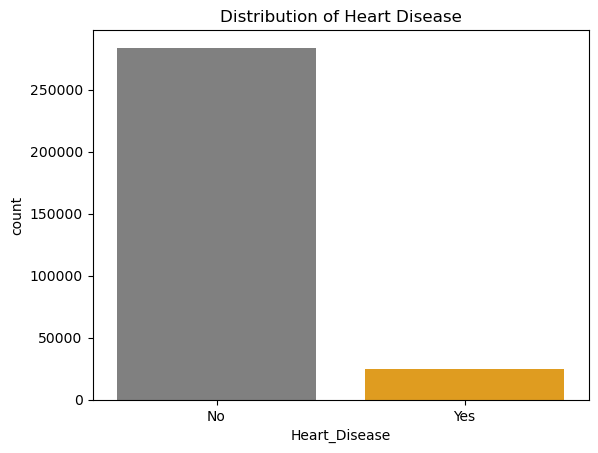

In [9]:
# Target variable analysis (Heart Disease):

color_map = {
    "Yes": "orange",
    "No": "grey"
}

sns.countplot(x='Heart_Disease', palette=color_map, data=df).set(title='Distribution of Heart Disease')

## - Insights:

- There is a significantly higher number of patients with no heart disease or myocardial infarction.

# Multivariate Analysis

In [10]:
corr = df.corr()

corr

Height_(cm)  Weight_(kg)       BMI  \
Height_(cm)                      1.000000     0.472186 -0.027408   
Weight_(kg)                      0.472186     1.000000  0.859699   
BMI                             -0.027408     0.859699  1.000000   
Alcohol_Consumption              0.128835    -0.032373 -0.108684   
Fruit_Consumption               -0.045911    -0.090612 -0.076611   
Green_Vegetables_Consumption    -0.030148    -0.075904 -0.070640   
FriedPotato_Consumption          0.108795     0.096351  0.048366   

                              Alcohol_Consumption  Fruit_Consumption  \
Height_(cm)                              0.128835          -0.045911   
Weight_(kg)                             -0.032373          -0.090612   
BMI                                     -0.108684          -0.076611   
Alcohol_Consumption                      1.000000          -0.012562   
Fruit_Consumption                       -0.012562           1.000000   
Green_Vegetables_Consumption             0.060053           0.270430   
FriedPotato_Consumption                  0.020543          -0.060311   

                              Green_Vegetables_Consumption  \
Height_(cm)                                      -0.030148   
Weight_(kg)                                      -0.075904   
BMI                                              -0.070640   
Alcohol_Consumption                               0.060053   
Fruit_Consumption                                 0.270430   
Green_Vegetables_Consumption                      1.000000   
FriedPotato_Consumption                           0.003180   

                              FriedPotato_Consumption  
Height_(cm)                                  0.108795  
Weight_(kg)                                  0.096351  
BMI                                          0.048366  
Alcohol_Consumption                          0.020543  
Fruit_Consumption                           -0.060311  
Green_Vegetables_Consumption                 0.003180  
FriedPotato_Consumption                      1.000000

## - Insights:

- High Correlation between: Weight & BMI
- Somewhat high correlation between: Weight & Height

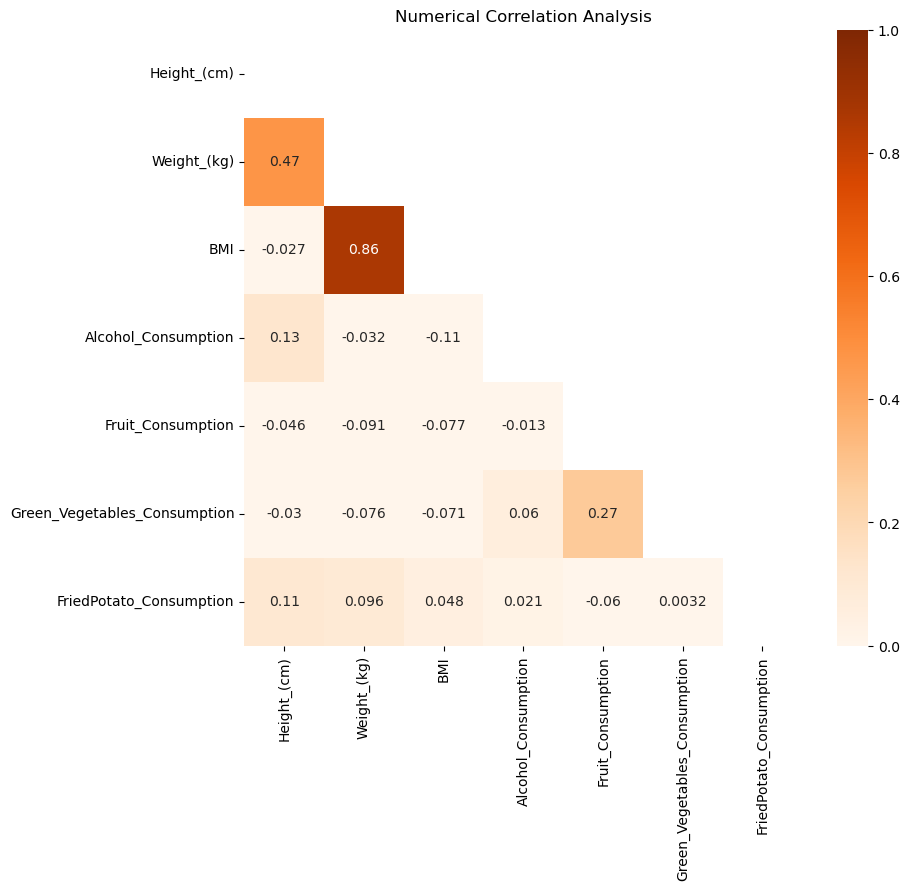

In [11]:
# Numerical Values Heatmap for Multivariate Analysis

# Generate a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(9, 8))
sns.heatmap(corr, mask=mask, cmap = 'Oranges', vmin=0, vmax=1, annot=True).set(title='Numerical Correlation Analysis')

plt.show()

## - Insights: 

- Height and Weight: A strong positive correlation of 0.47 indicates that as height increases, weight generally also increases.
- Weight and BMI: There's a very strong positive correlation of 0.86, suggesting that higher weights are associated with higher BMIs.
## - This is expected as BMI is a measure that takes weight & height into consideration.

<Figure size 2000x2000 with 0 Axes>

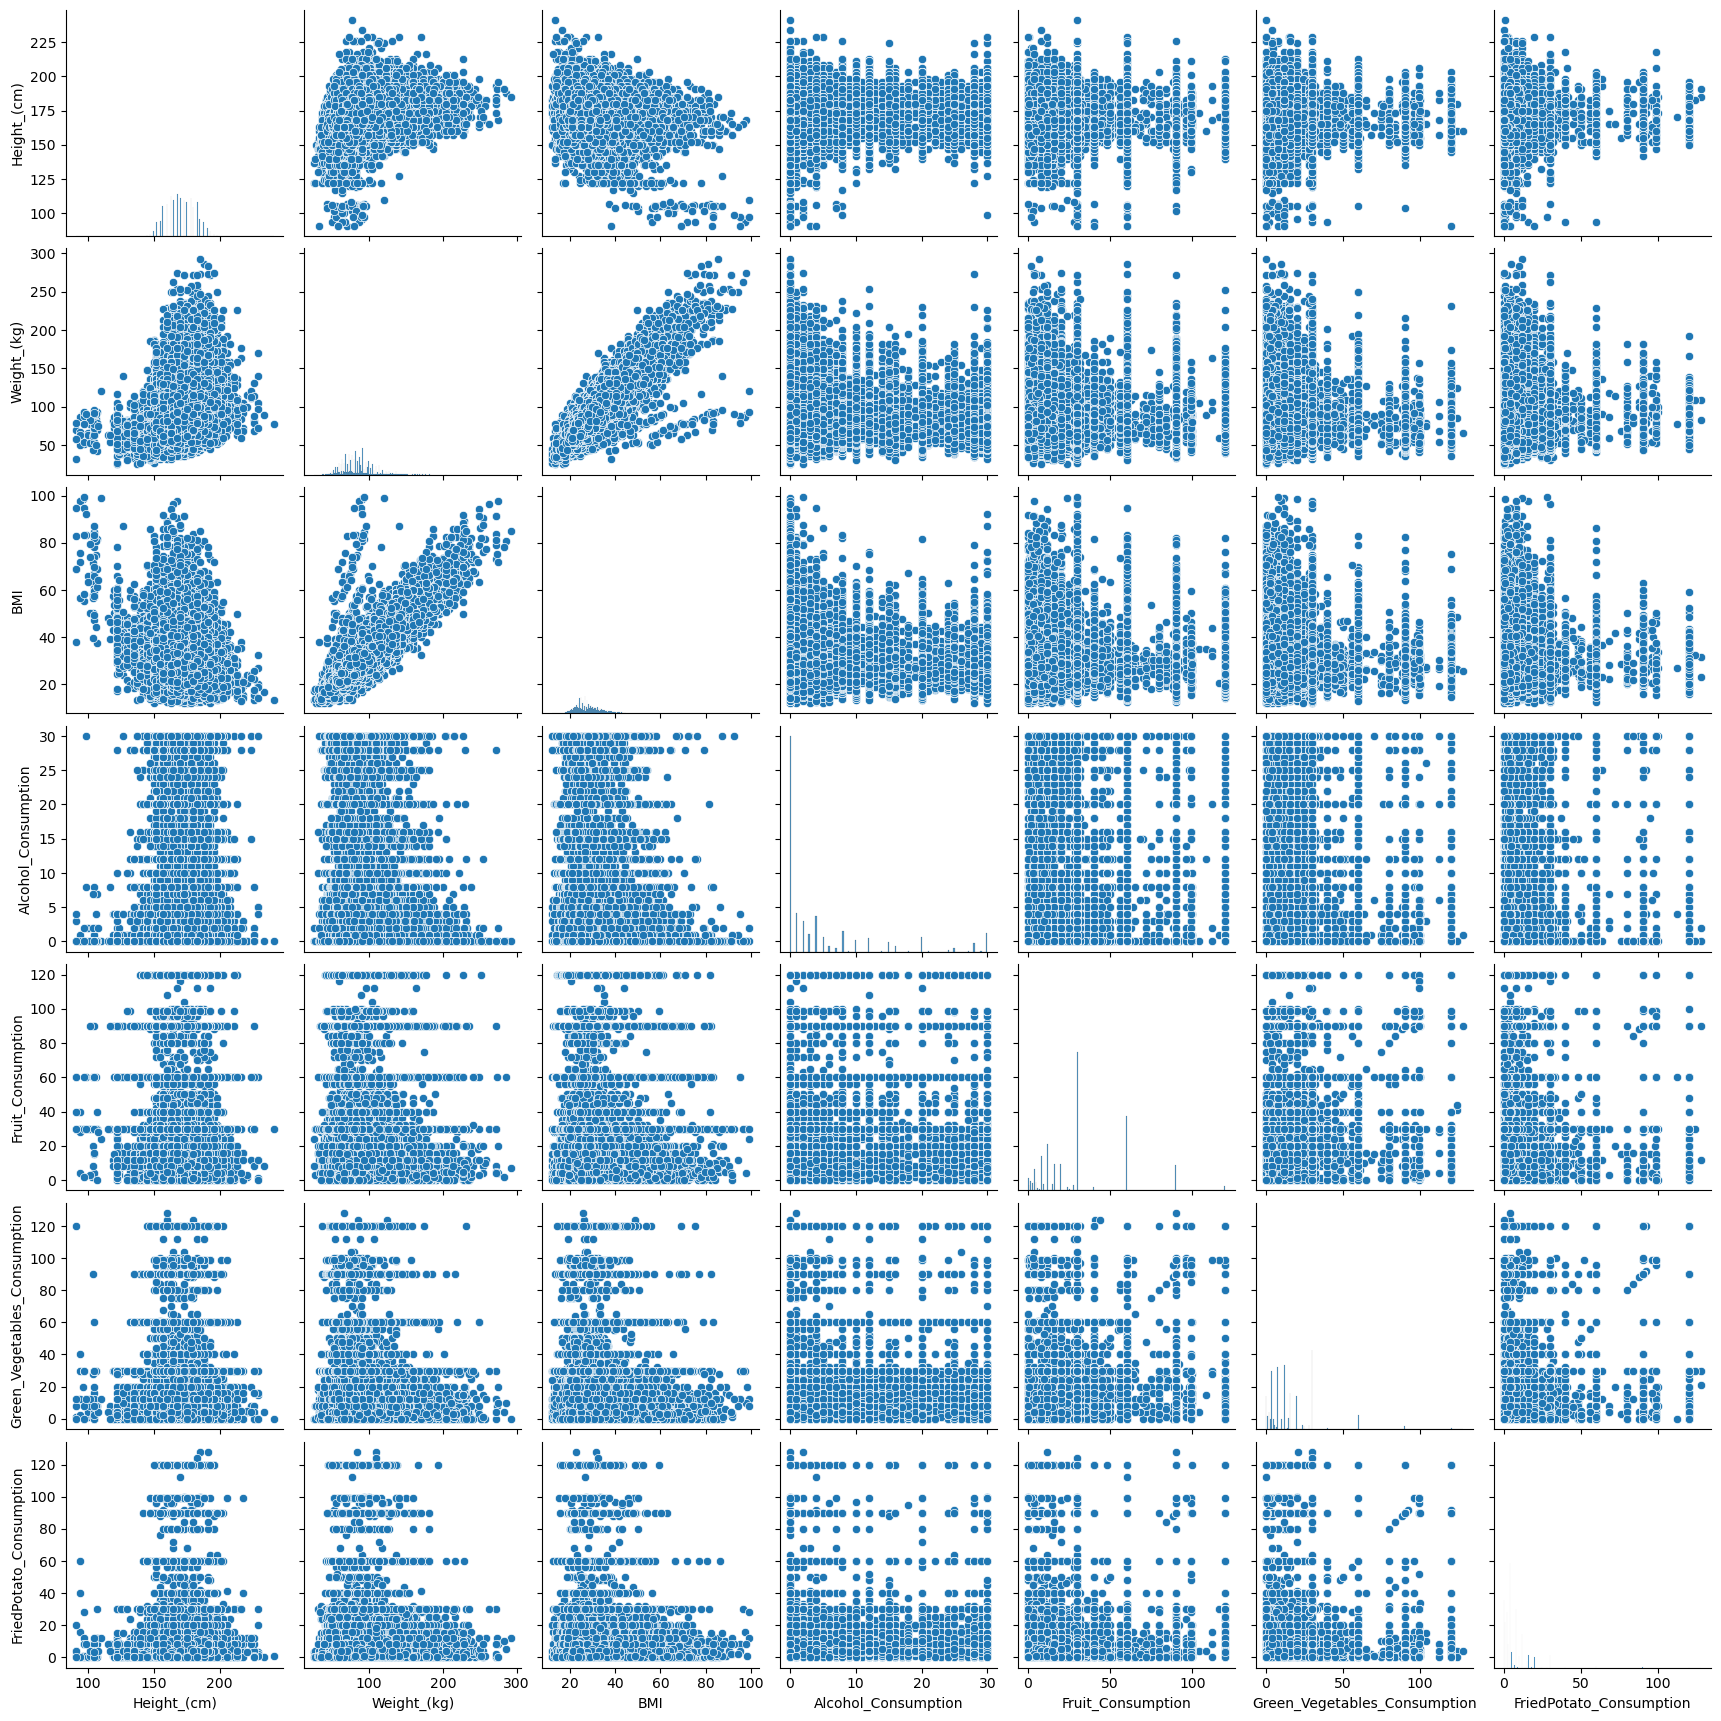

In [12]:
# Pair plot for pairwise combinations of variables: 

# useful for scatter plots between pairs of variables, which can show both linear and non-linear relationships
# helps in identifying any outliers or anomalies in the data
# shows areas where points cluster to indicate where most data points lie, which is useful for identifying patterns

# This will serve as a double check for relationship between the variables

plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

## - Insights: 

- The only clear trend is that between Weight & BMI and that between Weight & Height.
- The scatter plot between Weight and BMI shows a positive trend, confirming the correlation observed in the heatmap.
- The rest of the features have a more random spread that may suggest no clear relationship.

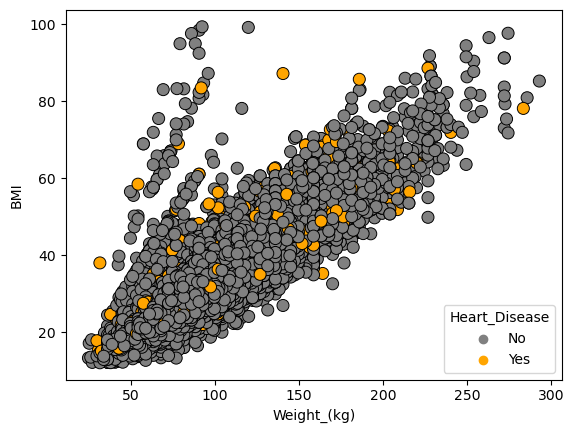

In [13]:
# To better visualize the relationship between Weight & BMI w/ the target, Heart Disease:

sns.scatterplot(data=df, x='Weight_(kg)', y='BMI', hue='Heart_Disease', palette=color_map,
                s=75,      
                alpha=1,   
                edgecolor="black")
plt.show()

## - Insights: 
- As weight increases, BMI also increases. This is expected as BMI is a measure that takes weight into consideration, along with height.
- The majority of data points cluster between weights of 50 kg to 200 kg and BMIs of 20 to 80.
- Higher BMI might be correlated with an increased risk of heart disease. However, it's important to note that there are still many individuals with higher BMIs who do not have heart disease. Also, this doesn't imply causation. Other factors not represented in this graph might be at play.
- There are a few individuals with extremely high weights (close to 300-350 kg) but with BMIs that are not proportionally high. This could be due to factors like height or errors in data recording. Therefore, a boxplot is needed to check for potential outliers more clearly.

# Bivariate Analysis:

- Examining each of the variables in relation to the target variable, Heart Disease.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

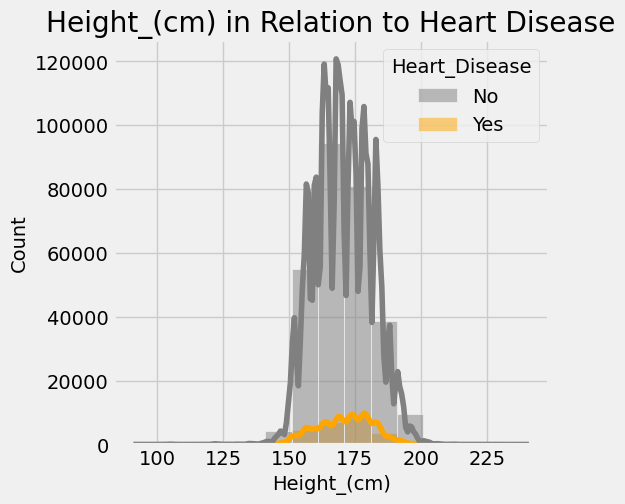

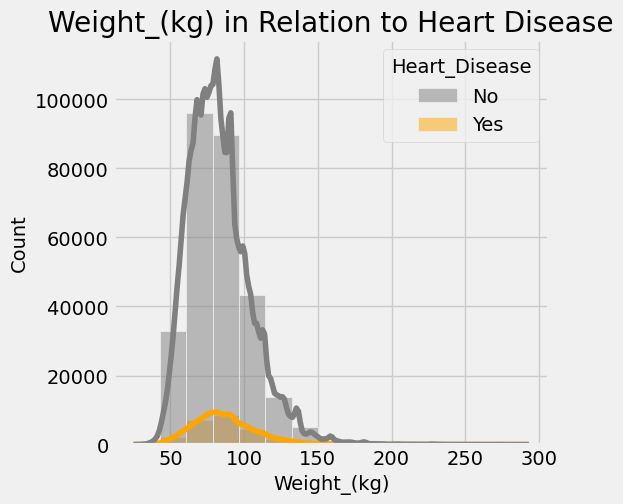

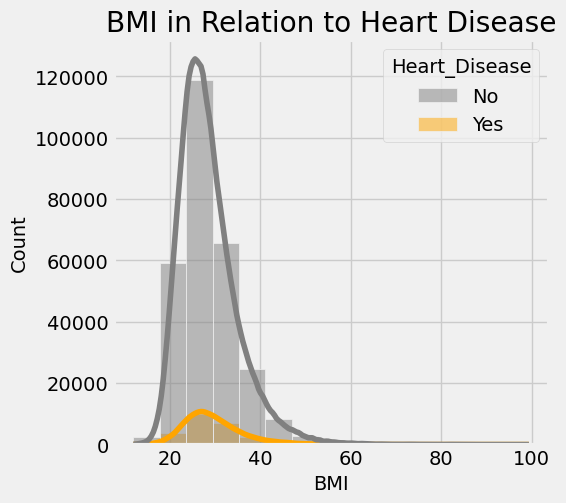

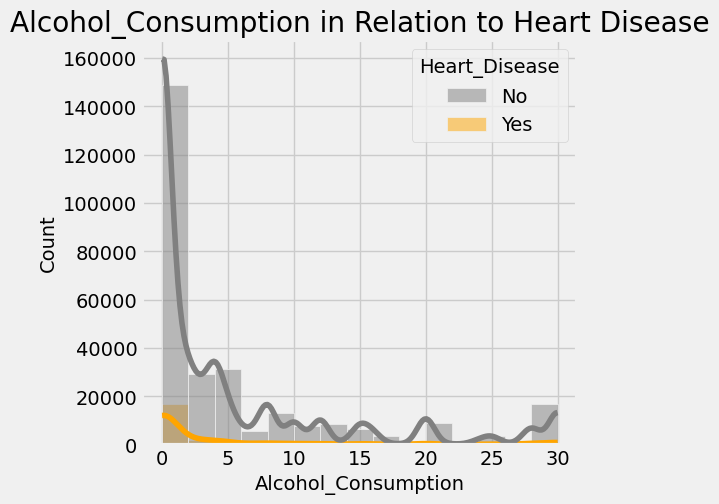

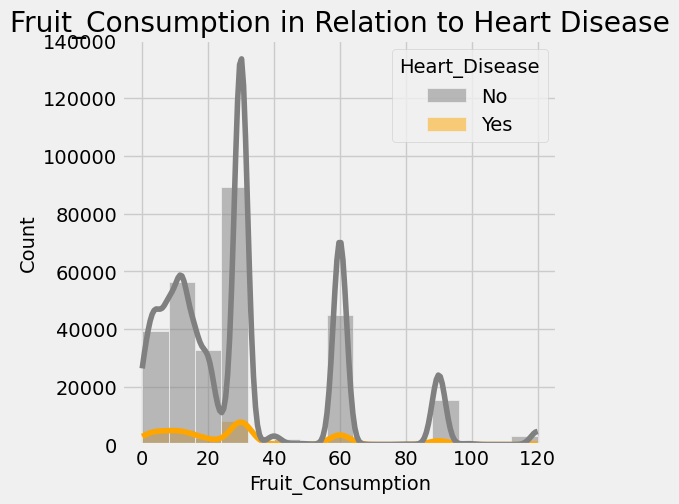

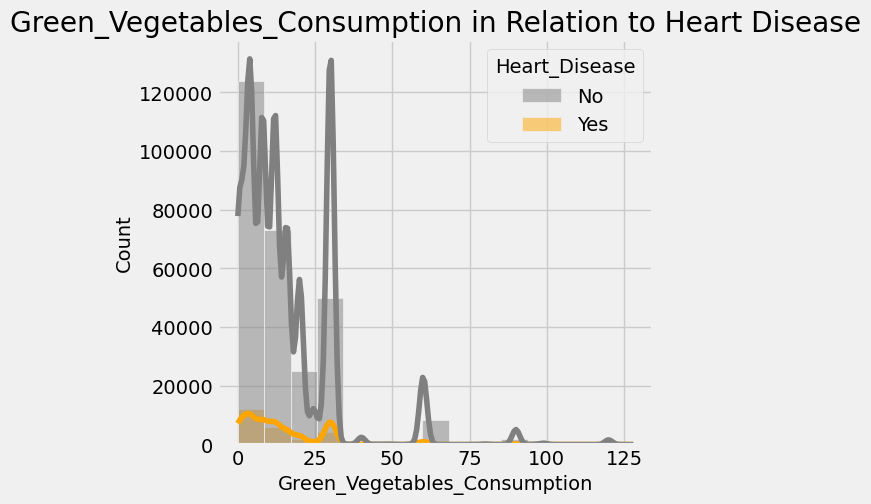

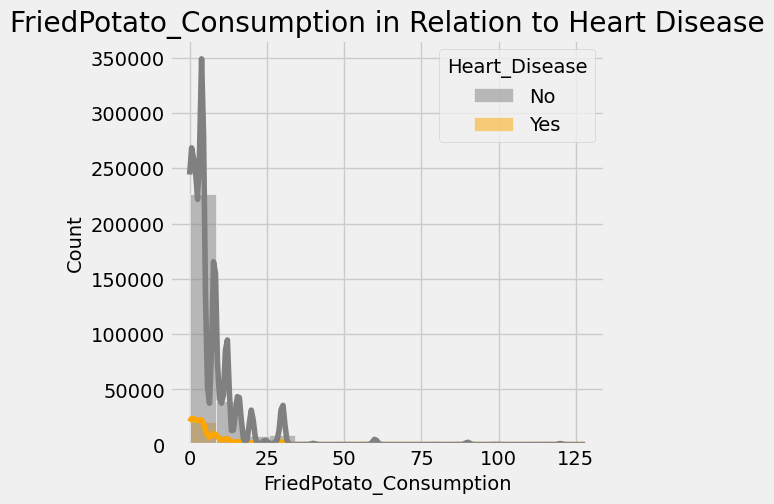

In [14]:
# Check the distribution of numerical variables

plt.style.use("fivethirtyeight")
numerical_variables = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for variable in numerical_variables:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df, x=variable, hue='Heart_Disease', palette=color_map, kde=True, bins=15).set(title=variable + ' in Relation to Heart Disease')

## - Insights: 

- Height:

Majority: 150-180 cm.

Higher heart disease: 170-180 cm.

No significant variance based on height.

----------------------------------------------------------------------------------------------------------------------

- Weight:

Majority: 50-100 kg.

Heart disease prevalent: 75-100 kg.

Weight doesn't drastically affect heart disease risk.

----------------------------------------------------------------------------------------------------------------------

- BMI:

Majority: 20-40.

Heart disease prevalent: 20-35.

Outliers present; no significant BMI-heart disease correlation.

----------------------------------------------------------------------------------------------------------------------

## - According to the questions in the BRFSS Questionnaire, the variables below concerning dietary choices refer to monthly intake. However, the  quantity entered can be in times per day, week, or month. 

- Alcohol Consumption:

Distribution: Heavily right-skewed.

Majority: Low consumption, 0-2.5 or 0-3 times.

Hint: High consumption slightly increases heart disease risk.

----------------------------------------------------------------------------------------------------------------------

- Fruit Consumption:

Majority: Regular consumption.

Peak: 25-30 times.

No clear fruit-heart disease correlation.

----------------------------------------------------------------------------------------------------------------------

- Green Vegetable Consumption:

Distribution: Right-skewed.

Majority: 0-15 times with outliers.

No direct vegetable-heart disease link.

----------------------------------------------------------------------------------------------------------------------

- Fried Potato Consumption:

Distribution: Right-skewed.

Majority: Low consumption, 0-15 times.

Unclear fried potato-heart disease correlation.

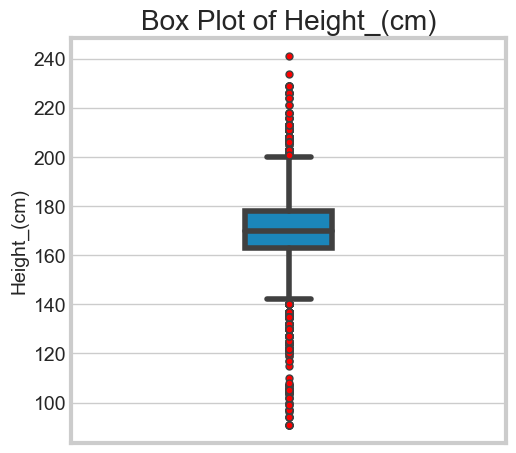

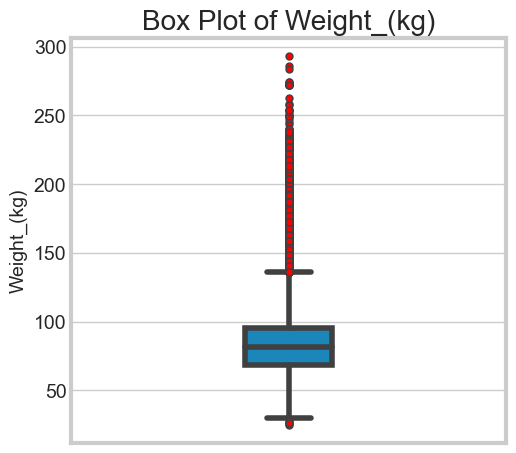

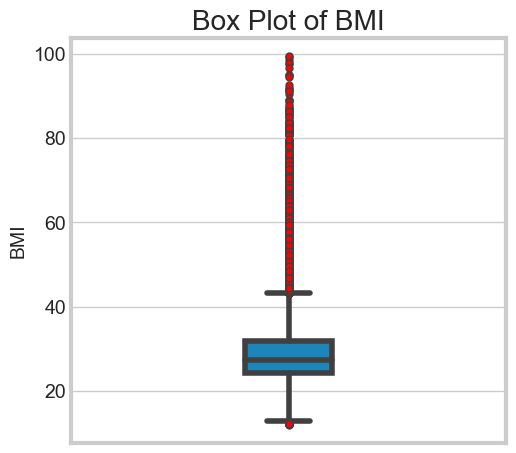

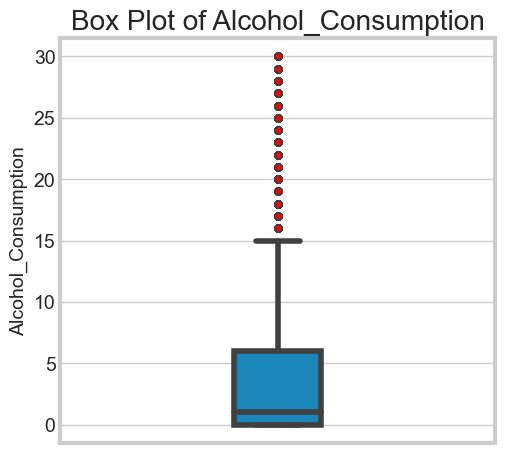

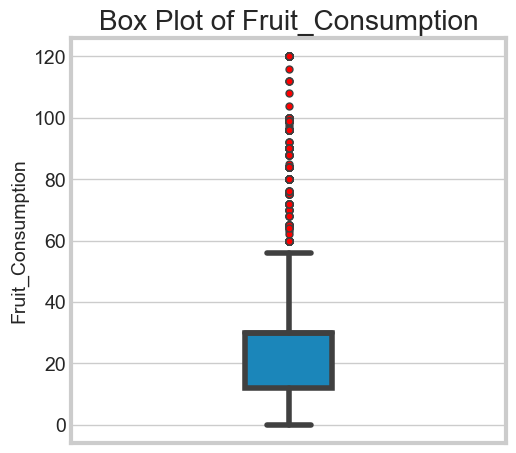

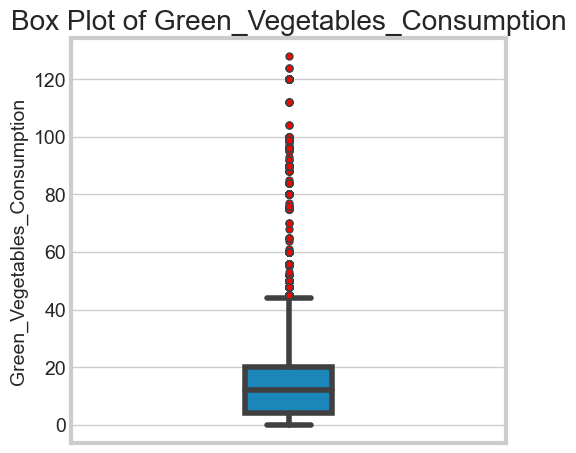

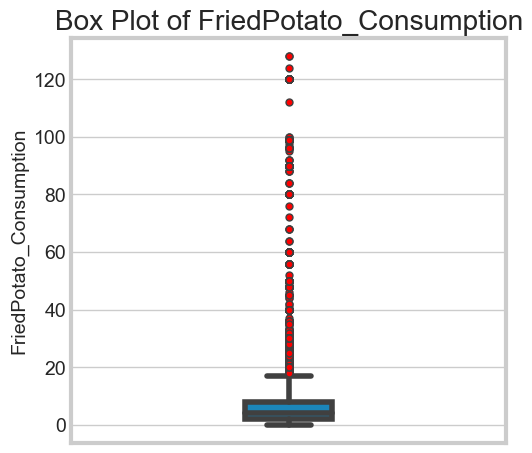

In [15]:
# Identify outliers or extreme cases: abnormally high or low values

sns.set_style("whitegrid")
for variable in numerical_variables:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[variable], width = 0.2, fliersize=5, flierprops={'marker':'o', 'markerfacecolor':'red'})
    plt.title(variable.replace('_', ' '))
    plt.title('Box Plot of ' + variable)  


## - Insights: 
- Height: 

The majority of the data is clustered around the middle, suggesting an average height range for most individuals.

There are outliers on both the lower and higher ends, representing particularly short and tall individuals, respectively. Most outliers range from approximately 90-140 cm & 200-240 cm.

----------------------------------------------------------------------------------------------------------------------

- Weight:

Outliers on the higher end represent individuals who weigh significantly more than the majority. Most outliers range from approximately 140-300 kg.

----------------------------------------------------------------------------------------------------------------------
- BMI: 

There are numerous outliers on the higher end ranging from approximately 45-100.

----------------------------------------------------------------------------------------------------------------------

- Alcohol Consumption: 

The main data cluster is towards the bottom, indicating that most individuals have a low alcohol consumption. 

Numerous outliers are present, representing individuals with significantly higher alcohol intake. 

Most outliers range from approximately 16-30.

----------------------------------------------------------------------------------------------------------------------
- Fruit Consumption:

Most outliers range from approximately 60-120.

----------------------------------------------------------------------------------------------------------------------

- Green Vegetable Consumption: 

The majority of the data lies towards the lower end. Most outliers range from approximately 45-130.

----------------------------------------------------------------------------------------------------------------------

- Fried Potato Consumption:

The majority of the data (the box) is close to the lower end, indicating that most people consume fried potatoes at a relatively lower quantity. 

Most outliers range from approximately 18-130.

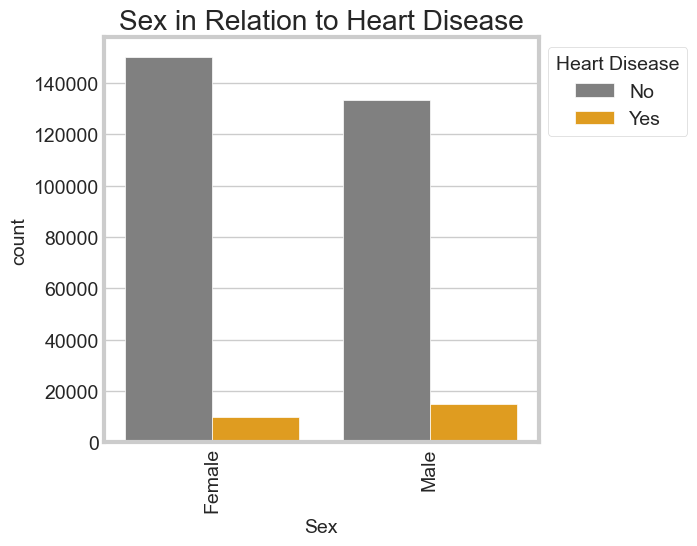

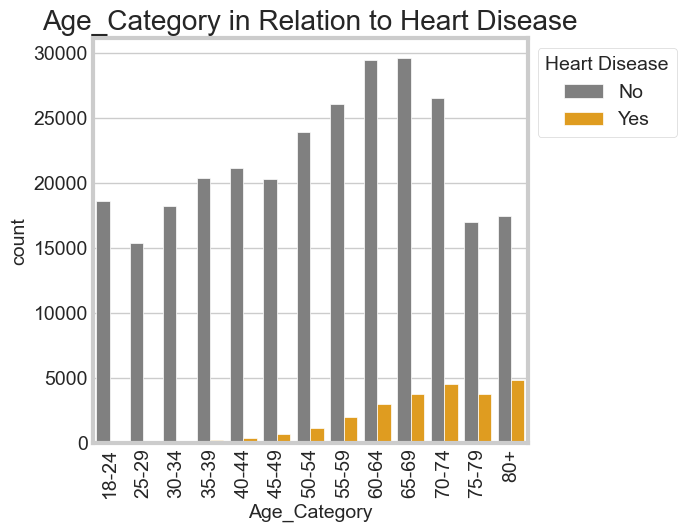

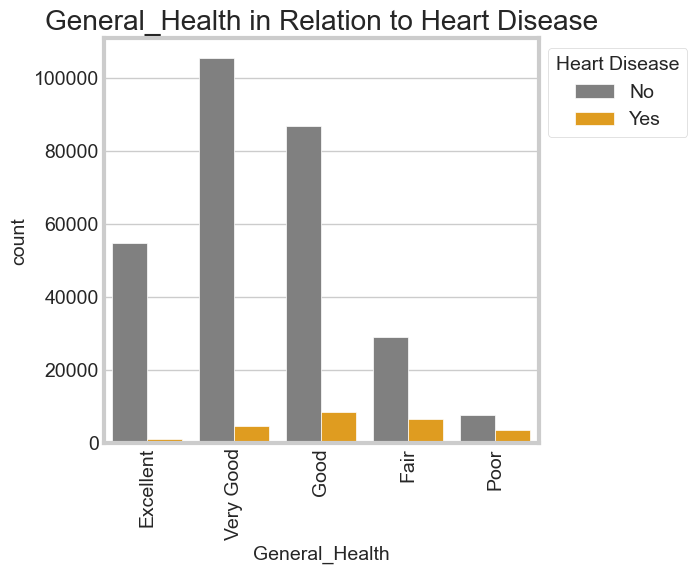

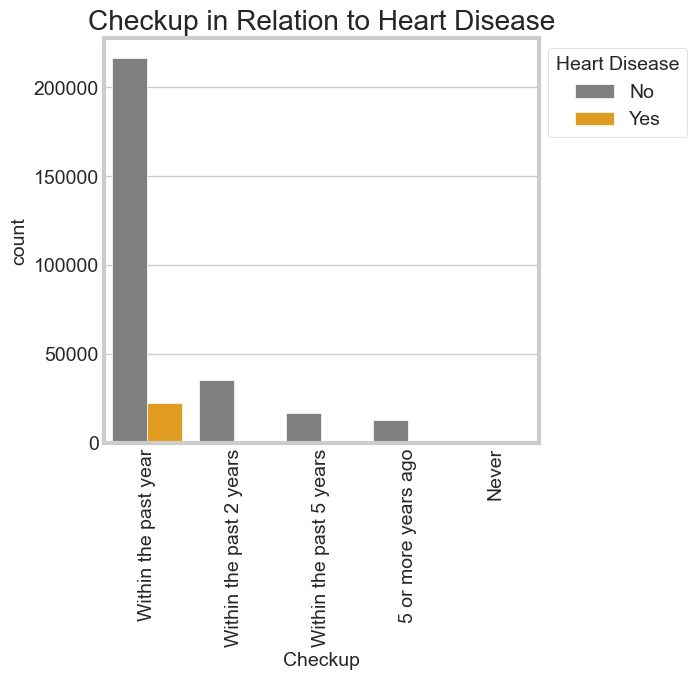

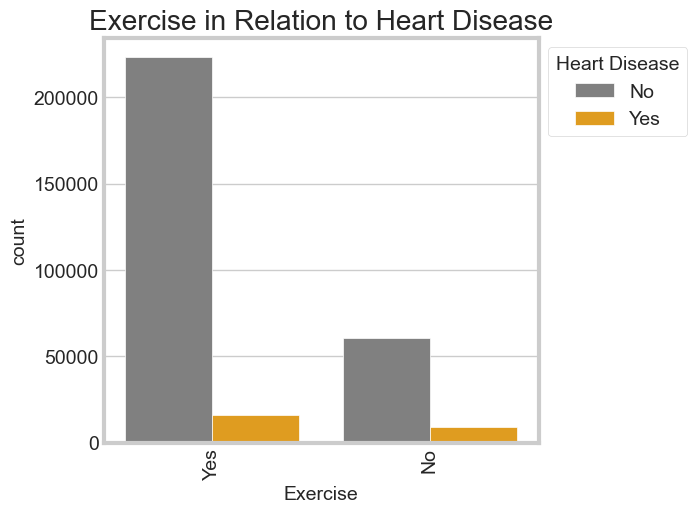

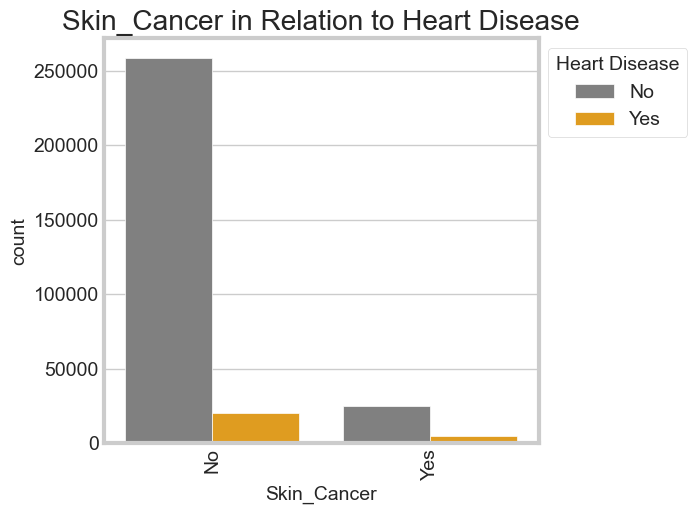

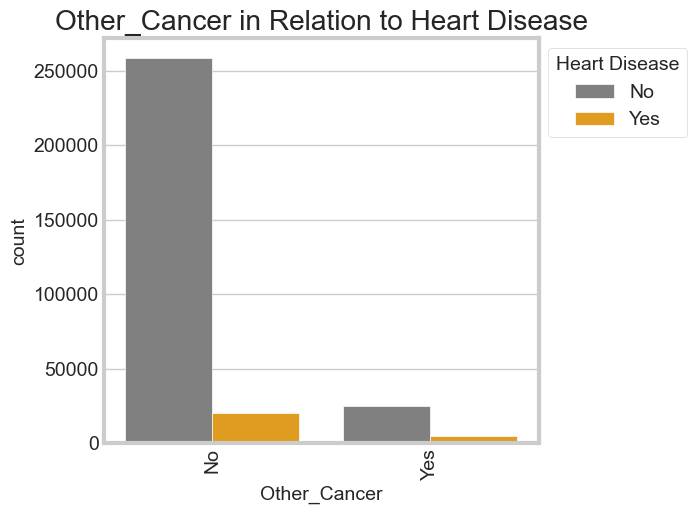

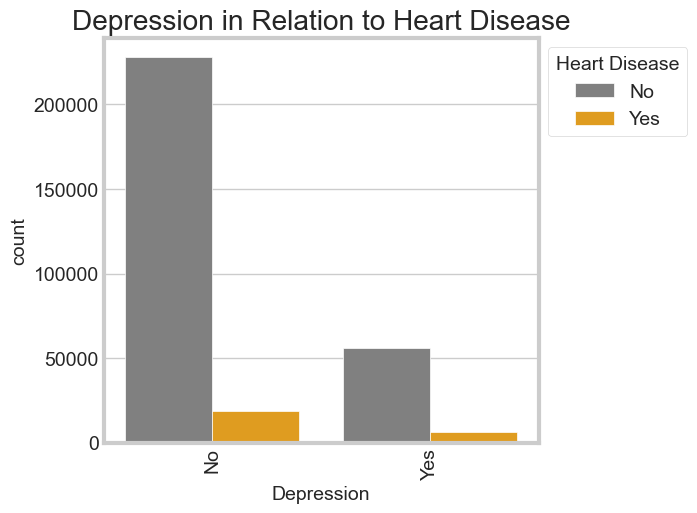

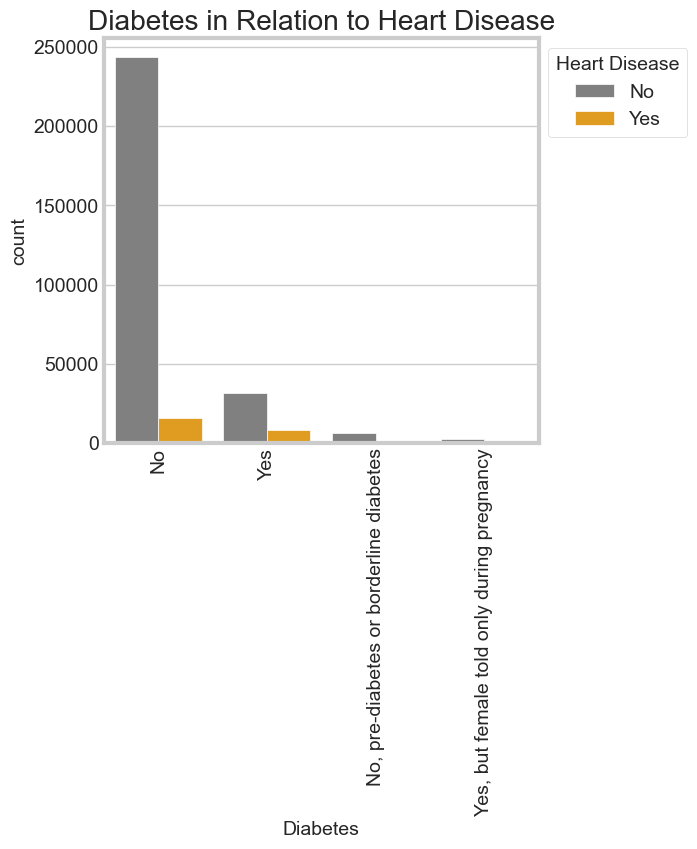

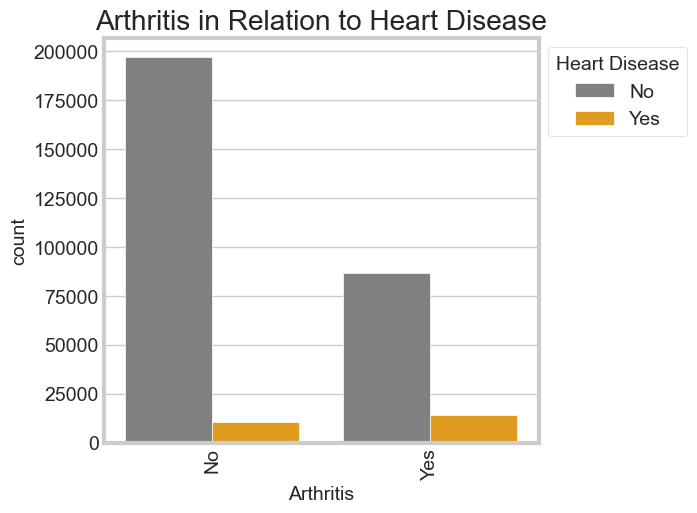

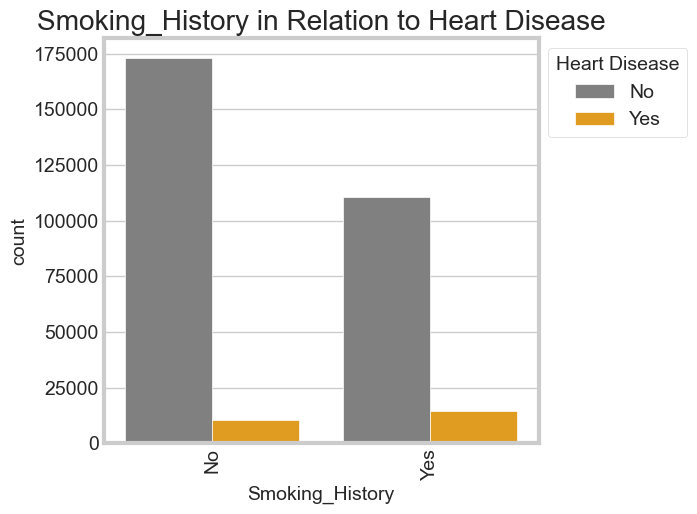

In [16]:
# Check the distribution of categorical variables and show how they relate to Heart disease, the target variable

categorical_variables = ['Sex', 'Age_Category', 'General_Health', 'Checkup', 
                         'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                         'Diabetes', 'Arthritis', 'Smoking_History']

custom_order = {
    'Age_Category': ['18-24', '25-29', '30-34', '35-39', 
                     '40-44', '45-49', '50-54', '55-59', 
                     '60-64', '65-69', '70-74', '75-79', '80+'], 
    'General_Health': ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
    'Checkup':['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never']
}

for variable in categorical_variables:
    plt.figure(figsize=(5, 5))
    if variable in custom_order:
        order = custom_order[variable]
    else:
        order = df[variable].value_counts().index
    sns.countplot(data=df, x=variable, hue='Heart_Disease', palette=color_map, order=order)
    plt.title(variable.replace('_', ' ')) 
    plt.title(variable + ' in Relation to Heart Disease')
    plt.legend(title='Heart Disease', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)

## - Insights: 

- Sex/Gender:

Both genders: Predominantly no heart disease.

Males: Slightly higher proportion with heart disease.

----------------------------------------------------------------------------------------------------------------------

- Age Category:

Younger age: Less heart disease.

Older age: Higher heart disease prevalence.

----------------------------------------------------------------------------------------------------------------------

- General Health:

Majority: "Very Good" or "Good".

Heart disease more prevalent in "Good" category.

Heart disease presence across all perceived health levels.

----------------------------------------------------------------------------------------------------------------------

- Checkup:

Majority: Checkup within the past year.

Heart disease presence in all checkup frequencies.

Regular checkups possibly aid in early detection/manage issues.

----------------------------------------------------------------------------------------------------------------------

- Exercise:

Majority: Engage in physical activity.

Exercise: Lower heart disease prevalence, but not an absolute safeguard.

----------------------------------------------------------------------------------------------------------------------

- Skin Cancer, Other Cancer, Depression, & Diabetes:

Majority: No conditions and no heart disease.

----------------------------------------------------------------------------------------------------------------------

- Arthritis:

Most: No arthritis.

Higher heart disease prevalence in arthritis patients.

----------------------------------------------------------------------------------------------------------------------

- Smoking History:

Majority: No smoking history.

More smoking: Higher heart disease prevalence.

# Other Useful Analyses: 

# Dietary Consumptions in Different Age groups & Gender:

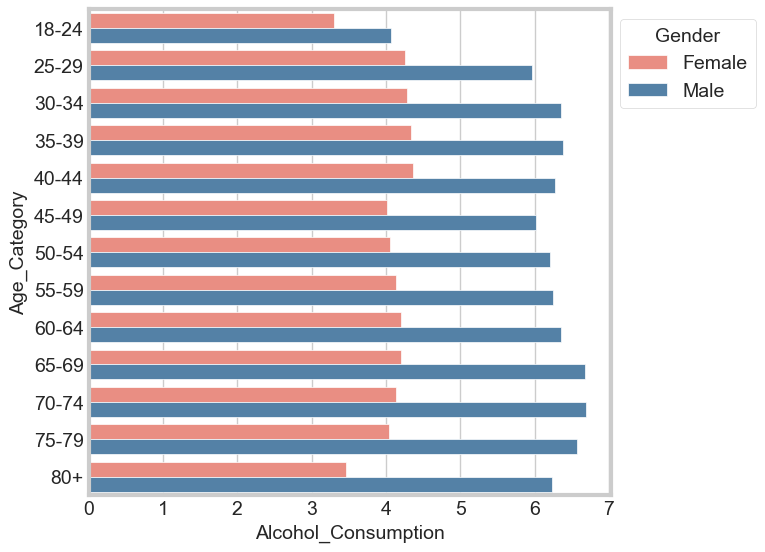

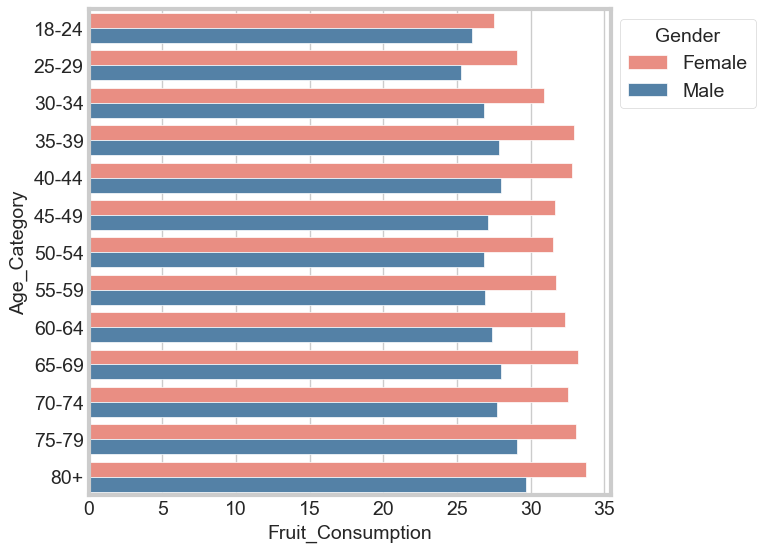

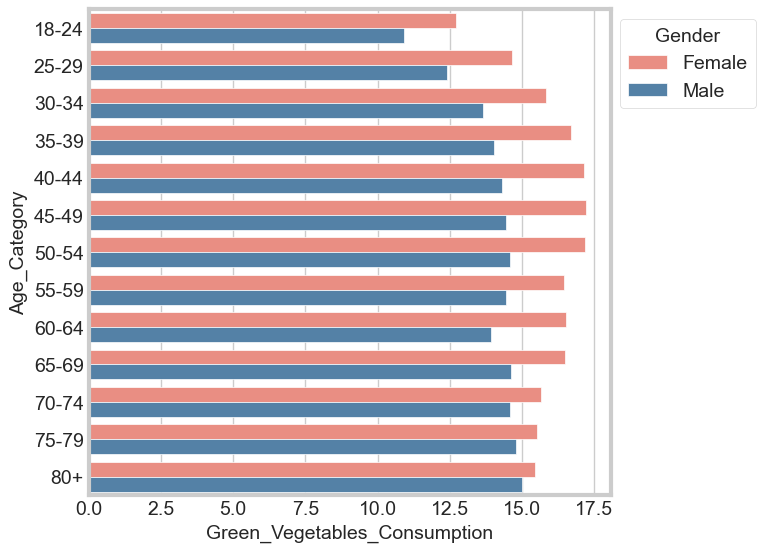

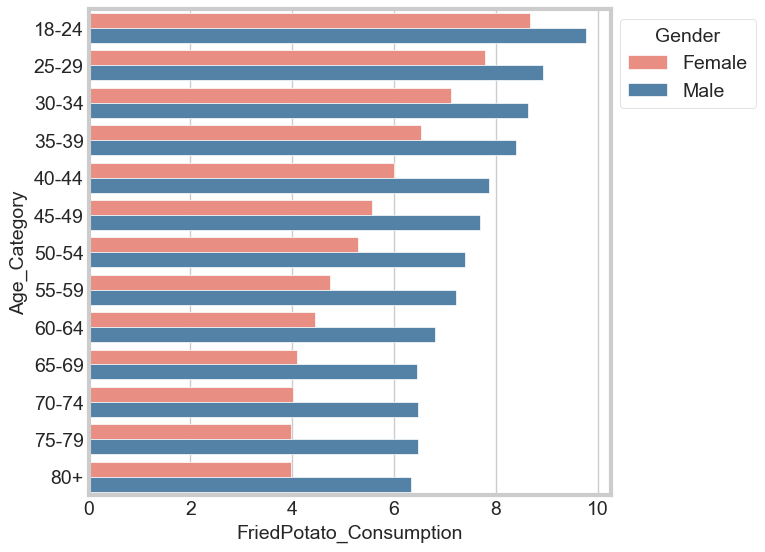

In [17]:
dietary_consumptions = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
   
colors = {
    'Male': 'steelblue',
    'Female': 'salmon'
}

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

for variable in dietary_consumptions:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=df, y='Age_Category', x=variable, order=age_order, hue='Sex', palette=colors,ci=None)
    plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))

## - Insights:

- Alcohol Consumption:

Males: Higher consumption across all ages.

18-24 age group: Males much higher than females.

Females (18-24): Comparatively low consumption.

----------------------------------------------------------------------------------------------------------------------

- Fruit Consumption:

High for both genders across ages.

18-24 age group: Females slightly higher than males.

----------------------------------------------------------------------------------------------------------------------

- Green Vegetable Consumption:

High for both genders across ages.

18-24 age group: Males notably lower than females.

----------------------------------------------------------------------------------------------------------------------

- Fried Potato Consumption:

High for both genders across ages.

Males: Slightly higher than females in most ages.

----------------------------------------------------------------------------------------------------------------------

- Bad Eating Habits (Alcohol & Fried Potatoes):

Males: Generally higher bad habits, especially alcohol (18-24).

- Good Eating Habits (Green Veggies & Fruits):

Both genders: High consumption across ages.

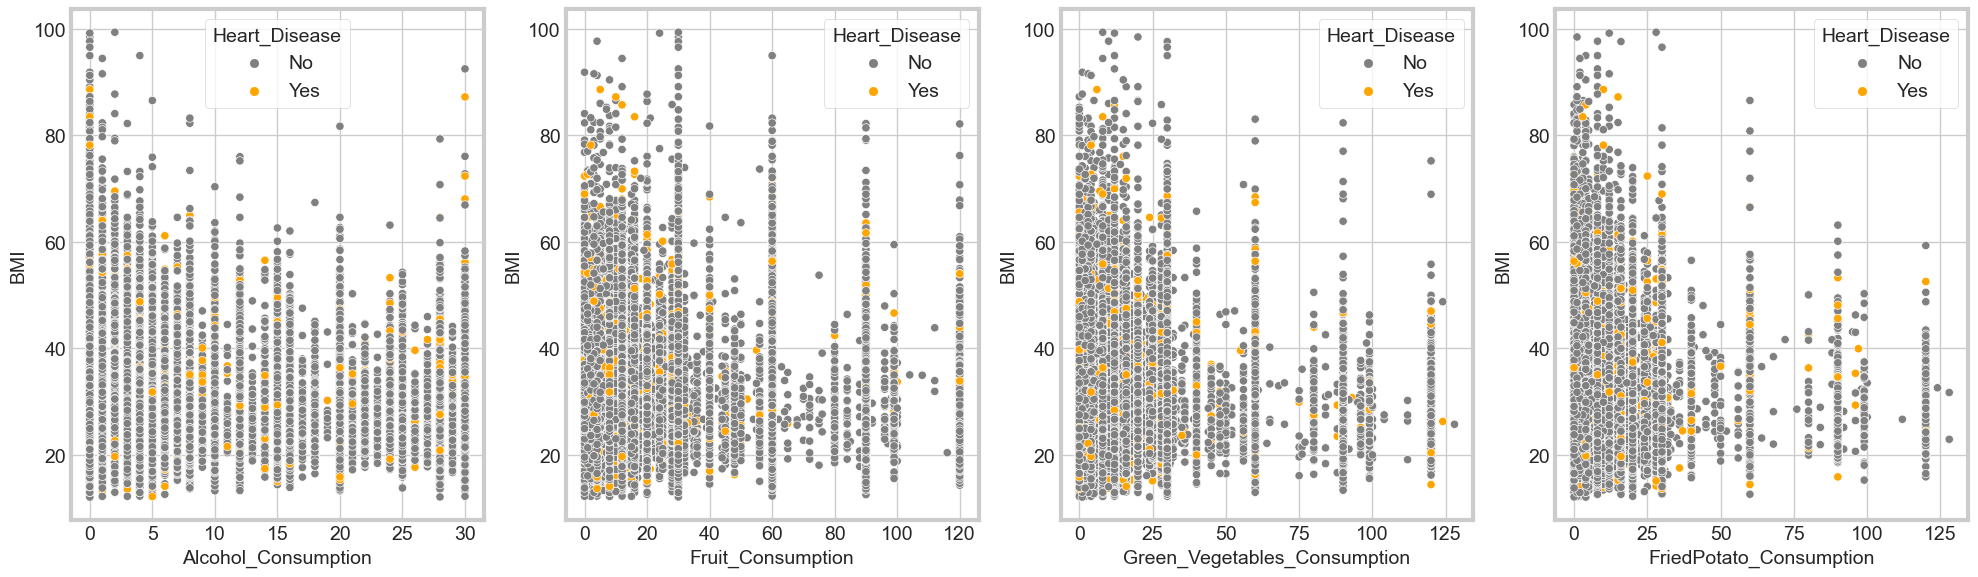

In [18]:
# Create subplots for each of the consumption choices:

plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
for i, variable in enumerate(dietary_consumptions, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df, x=variable, y="BMI", hue="Heart_Disease", palette=color_map)
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()

## - Insights:

- Fried Potato Consumption:

Majority: Consume 0-50 times across all BMI.

No clear trend linking consumption to heart disease in this particular graph.

----------------------------------------------------------------------------------------------------------------------

- Green Vegetables Consumption:

Majority: Consume 0-100 times.

Heart disease: Concentrated in lower to middle BMI, irrespective of consumption.

----------------------------------------------------------------------------------------------------------------------

- Fruit Consumption:

Majority: Consume 0-75 times.

Heart disease: Spread across all BMI, no distinct consumption pattern.

----------------------------------------------------------------------------------------------------------------------

- Alcohol Consumption:

Majority: Consume 0-10 units.

Slight heart disease concentration in higher BMI (>80), no conclusive correlation.

----------------------------------------------------------------------------------------------------------------------

- Key Takeaways:

Fried potatoes + higher BMI: Potential heart disease concern.

Moderate green veggies and fruits: Possibly lower heart disease prevalence.

Higher BMI: Consistently linked to higher heart disease prevalence.

## - According to these scatterplots, in addition to the barplots regarding age category & each of the dietary choices:

- Males seem to have more bad eating/drinking habits than their female counterparts, which could be one of the reasons to why heart disease prevalence is higher in males than in females.

# Statistical Analysis through Statistical Significance:

- This is useful for a number of reasons:

Validity: Checking for statistical significance helps validate the observations from the data. Instead of relying on just visual or intuitive differences between groups, statistical tests give a measure of how likely these differences are due to actual associations versus occurring by chance.


Decision Making: P-values and statistical tests assist in decision-making. For instance, if gender significantly influences heart disease prevalence, it could be crucial for health campaigns, policy-making, and clinical decisions.


Refining Focus: By understanding which variables are statistically significant, researchers can refine their focus, making subsequent analyses or experiments more targeted and efficient.

# Chi-Square Test:

- this test involves checking if there's a significant association between two categorical variables.


## Are Age, General Health, Exercise Habits, Smoking History, and Gender Statistically Associated with the Prevalence of Heart Disease?

In [19]:
chosen_variables = ['Age_Category', 'General_Health', 'Exercise', 'Smoking_History', 'Sex']

for var in chosen_variables:
    # Creating a contingency table for each variable
    contingency = pd.crosstab(df[var], df['Heart_Disease'])
    
    # Performing the chi-square test
    chi2, p, _, _ = stats.chi2_contingency(contingency)

    print(f"{var}:\n")
    # A large value indicates that the two categorical variables are not independent and are related in some way.
    # A small value suggests that any differences could be due to random chance alone, indicating that the variables might be independent
    print("Chi2 Value = ", chi2)
    print("P-Value = ", p)

    if p < 0.05:
        print(f"The association between {var} and Heart Disease is statistically significant.\n")
    else:
        print(f"There's no statistically significant association between {var} and Heart Disease.\n")

Age_Category:

Chi2 Value =  18035.930858650143
P-Value =  0.0
The association between Age_Category and Heart Disease is statistically significant.

General_Health:

Chi2 Value =  19234.33413703971
P-Value =  0.0
The association between General_Health and Heart Disease is statistically significant.

Exercise:

Chi2 Value =  2866.154497542652
P-Value =  0.0
The association between Exercise and Heart Disease is statistically significant.

Smoking_History:

Chi2 Value =  3588.1356452730433
P-Value =  0.0
The association between Smoking_History and Heart Disease is statistically significant.

Sex:

Chi2 Value =  1627.1191844519758
P-Value =  0.0
The association between Sex and Heart Disease is statistically significant.



## - Insights:

Age_Category: Age is significantly associated with the prevalence of heart disease. This is not surprising given that age is a well-known risk factor for many heart conditions.

--------------------------------------------------------------------------------------------------------------------------------

General_Health: The way individuals rate their general health has a significant association with the prevalence of heart disease. Those who rate their health poorly might be more likely to have or develop heart disease.

--------------------------------------------------------------------------------------------------------------------------------

Exercise: The exercise habits of individuals are significantly related to heart disease prevalence. Regular exercise is known to have cardiovascular benefits, so it's logical that there would be an association.

--------------------------------------------------------------------------------------------------------------------------------

Smoking_History: Smoking is significantly associated with heart disease. This too is expected since smoking is a prominent risk factor for heart diseases.

--------------------------------------------------------------------------------------------------------------------------------

Sex: Gender has a significant association with heart disease prevalence. The difference could be due to biological reasons, lifestyle differences, or even healthcare access and utilization differences between the sexes.

# ANOVA (Analysis of Variance) Test:

- a statistical method used to test the differences between two or more means. It evaluates whether the means of several groups are equal, which is essentially testing the hypothesis that the groups don't have any significant difference in terms of their means.

## How Might Age, General Health, and Frequency of Checkups Contribute Indirectly to Heart Disease Risk Through Their Influence on BMI?

In [20]:
# An ANOVA Test for my dataset would be most useful for features with more than 2 categories
# For my dataset, this would apply to: General Health, Checkup, & Age_Category

group_variables = ['Age_Category', 'General_Health', 'Checkup']

for var in group_variables:
    # Group data by BMI
    grouped_data = [df['BMI'][df[var] == value].values for value in df[var].unique()]

    # Perform ANOVA
    f_stat, p_val = stats.f_oneway(*grouped_data)

    print(f"{var}:\n")
    # large F-statistic will indicate that that at least one group mean is different from the others
    # Small F-statistic will indicate that the group means aren't that different when considering the variability within each group
    print("F-statistic = ", f_stat)
    print("P-Value = ", p_val)

    if p_val < 0.05:
        print(f"There is a significant difference in the means of BMI occurrence for different {var} categories.\n")
    else:
        print(f"There is no significant difference in the means of BMI occurrence for different {var} categories.\n")

Age_Category:

F-statistic =  756.8109676458419
P-Value =  0.0
There is a significant difference in the means of BMI occurrence for different Age_Category categories.

General_Health:

F-statistic =  5319.901264061136
P-Value =  0.0
There is a significant difference in the means of BMI occurrence for different General_Health categories.

Checkup:

F-statistic =  351.049884669933
P-Value =  4.150150973824421e-302
There is a significant difference in the means of BMI occurrence for different Checkup categories.



## - Insights:

Age_Category: There is a significant difference in the means of BMI across different age categories. This implies that as age changes, there is a discernible shift in BMI values among the groups.

--------------------------------------------------------------------------------------------------------------------------------

General_Health: The average BMI varies significantly across the different general health categories. This suggests that there's a connection between how someone rates their general health and their BMI.

--------------------------------------------------------------------------------------------------------------------------------

Checkup: There's a significant variation in the average BMI values among the different categories for when a person last had a checkup. The reasons behind this can be different – it could be because regular check-ups might prompt more health-conscious behavior or because certain health outcomes (which might also be linked with BMI) lead individuals to get more frequent checkups.

# Data Modification for Better Analysis:

In [21]:
# Since there might be other factors influencing the prevalence of Heart Disease, we need to get a better analysis of the data 
# Notice there is 'No' and 'Yes' for most of the one-hot encoding categorical value, which need to change to 0 and 1

# Mapping for Diabetes
diabetes_map = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_map)

# Convert remaining categorical variables with "Yes" and "No" values to binary format
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 
                                 'No': 0})
    
# One-hot encoding to seperate gender into two different columns
df = pd.get_dummies(df, columns=['Sex'])

# Ordinal encoding for General_Health, Checkup, Age_Category

general_health_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_map)

checkup_map = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4
    
}
df['Checkup'] = df['Checkup'].map(checkup_map)


age_category_map = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_map)    

In [22]:
# Display the first few rows of the cleaned dataset
df.head()

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               0      2.0         0              0            0   
1               3      4.0         0              1            0   
2               3      4.0         1              0            0   
3               0      4.0         1              1            0   
4               2      4.0         0              0            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Age_Category  Height_(cm)  \
0             0           0         0          1            10        150.0   
1             0           0         1          0            10        165.0   
2             0           0         1          0             8        163.0   
3             0           0         1          0            11        180.0   
4             0           0         0          0            12        191.0   

   Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0        32.66  14.54                1                  0.0   
1        77.11  28.29                0                  0.0   
2        88.45  33.47                0                  4.0   
3        93.44  28.73                0                  0.0   
4        88.45  24.37                1                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  \
0               30.0                          16.0                     12.0   
1               30.0                           0.0                      4.0   
2               12.0                           3.0                     16.0   
3               30.0                          30.0                      8.0   
4                8.0                           4.0                      0.0   

   Sex_Female  Sex_Male  
0           1         0  
1           1         0  
2           1         0  
3           0         1  
4           0         1

In [23]:
df.dtypes

General_Health                    int64
Checkup                         float64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Age_Category                      int64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
Sex_Female                        uint8
Sex_Male                          uint8
dtype: object

# Correlation Analysis on Modified Data:

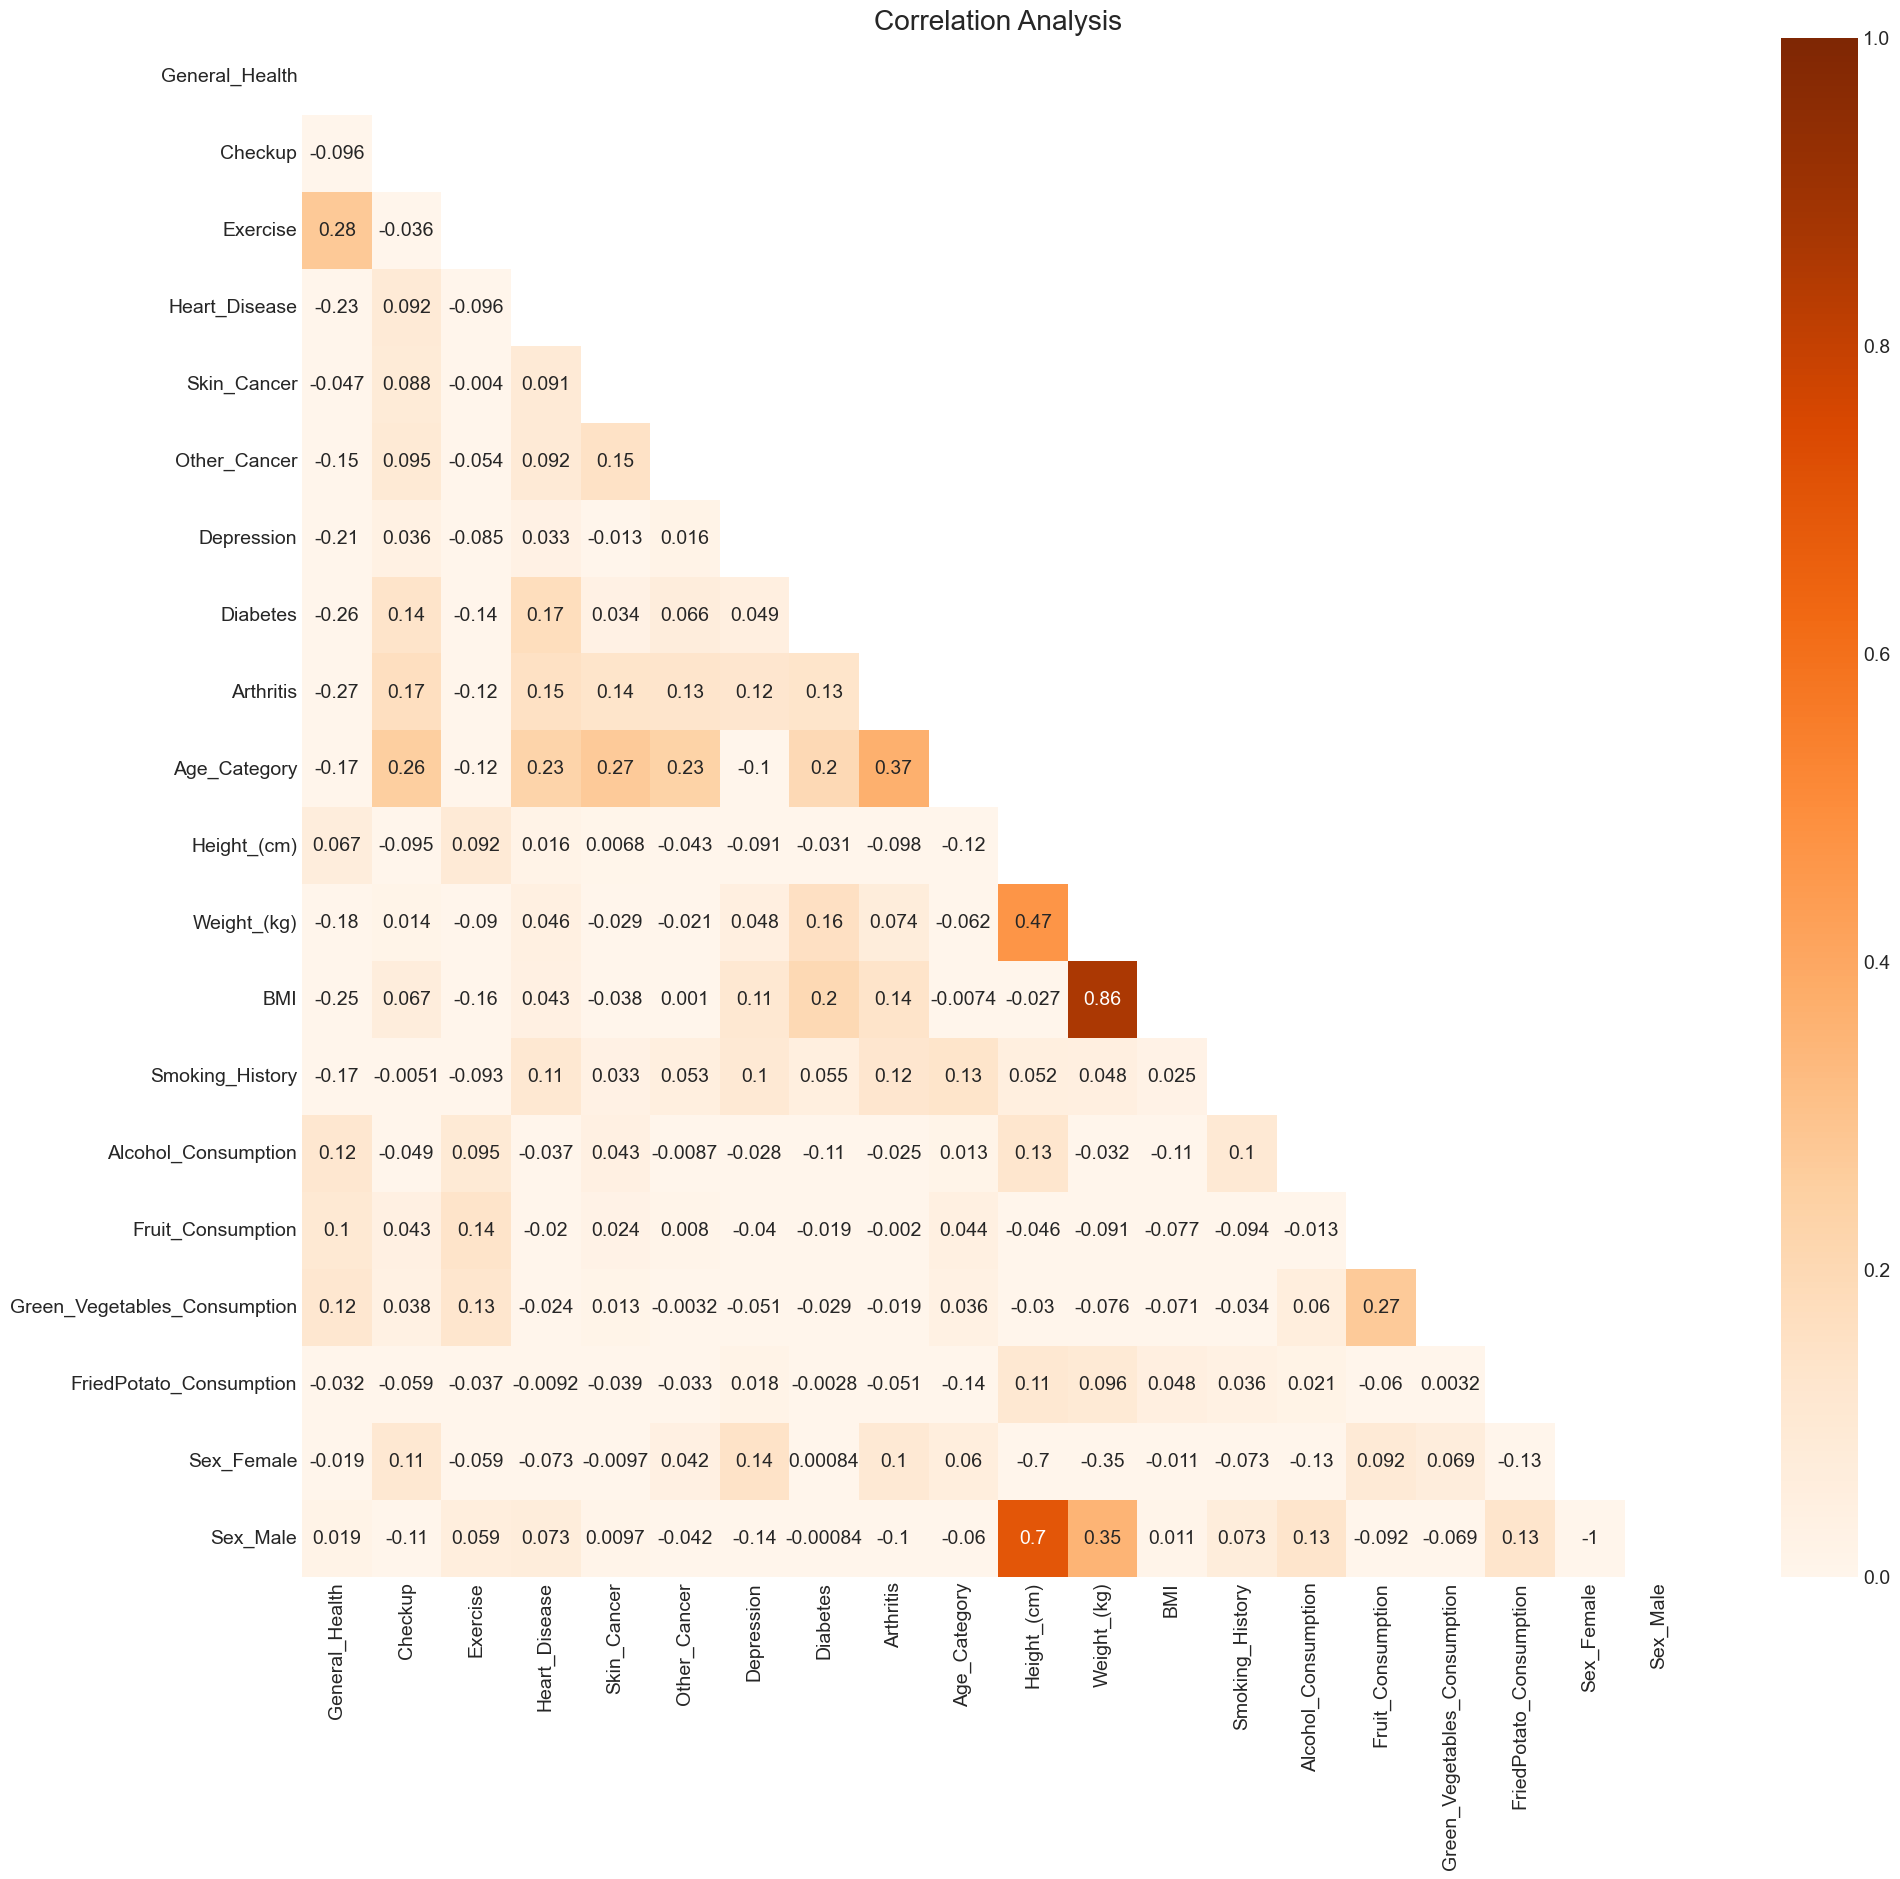

In [24]:
corr = df.corr()

# Generate a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 19))
sns.heatmap(corr, mask=mask, cmap='Oranges', vmin=0, vmax=1, annot=True, ax=ax)
ax.set_title('Correlation Analysis')
ax.grid(False) 
plt.show()

## - Insights: 

- General_Health:

Negative correlation (-0.23).

Better health = lower heart disease risk.

----------------------------------------------------------------------------------------------------------------------

- Exercise:

Negative correlation (-0.096).

Mildly reduces the risk of heart disease.

----------------------------------------------------------------------------------------------------------------------

- Arthritis:

Positive correlation (0.13).

Slightly higher heart disease risk.

----------------------------------------------------------------------------------------------------------------------

- Age_Category:

Positive correlation (0.23).

Older age = higher heart disease risk.

----------------------------------------------------------------------------------------------------------------------

- Weight_(kg) and BMI:

Positive correlations (0.18 and 0.25 respectively).

Higher weight/BMI = higher heart disease risk.

----------------------------------------------------------------------------------------------------------------------

- Smoking_History:

Positive correlation (0.13).

Smoking = heart disease risk factor.

----------------------------------------------------------------------------------------------------------------------

- Sex/Gender:

Males: Positive correlation (0.11).

Females: Negative correlation (-0.11).

Males have a slightly higher heart disease risk.

----------------------------------------------------------------------------------------------------------------------

- Notable Insights:

Strongest correlations w/ Heart Disease: BMI, Age_Category, General_Health.

Exercise and Smoking_History: Weaker correlations but also play a role, despite their correlations being weaker. Still, promoting regular exercise and discouraging smoking can be beneficial strategies.

Gender differences in heart disease are evident.